# 전세계 음주 데이터 분석하기

# <1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

-----

# <2. 탐색과 시각화 >

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [6]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산


               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


##### [여러 피처의 상관관계 분석]

In [7]:
# 피처간의 상관계수 행렬


                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


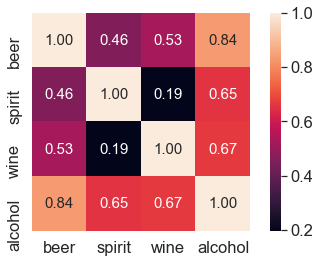

In [8]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()



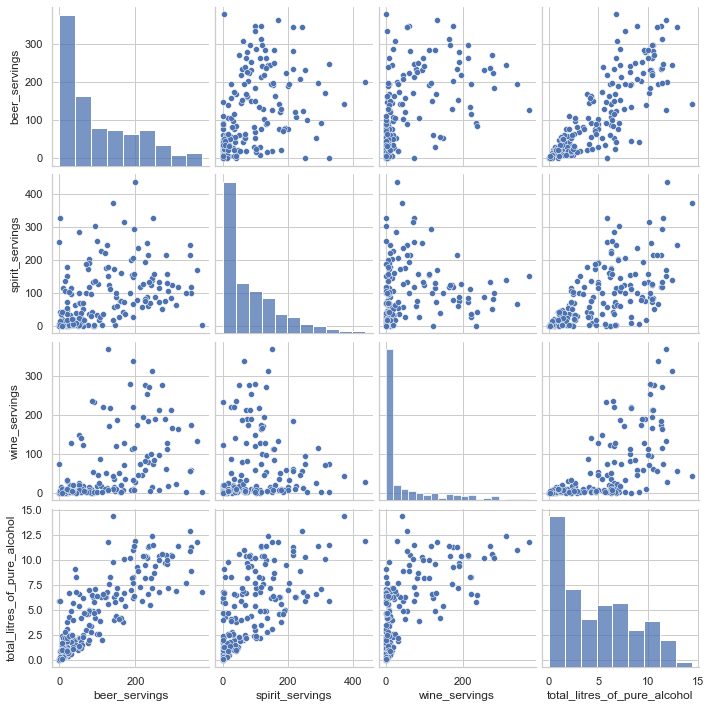

In [9]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

# <3. 탐색적 분석> 

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

-----

##### 파이차트 시각화

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [17]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.


,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [18]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.


continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [19]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.


EU


##### 분석 결과에 대한 시각화

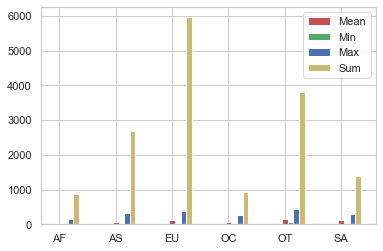

In [20]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

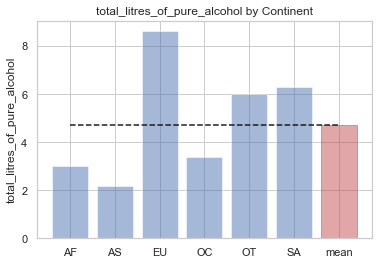

In [21]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

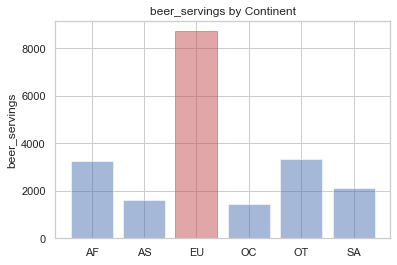

In [22]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

-----

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


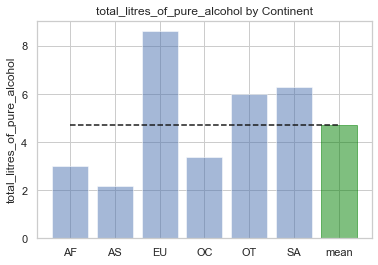

In [24]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.


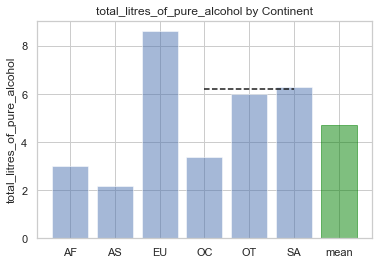

In [25]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.


-----

# <4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기

### [아프리카와 유럽간의 맥주 소비량 차이 검정하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install scipy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [26]:
!pip install scipy

In [27]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.


The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [28]:
# total_servings 피처를 생성

# 술 소비량 대비 알콜 비율 피처를 생성


# 순위 정보를 생성


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


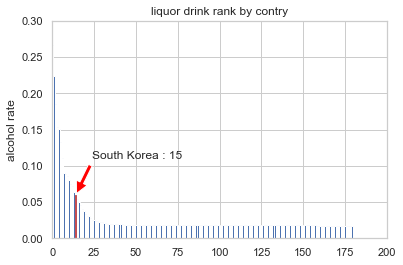

In [29]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

-----

# 실습
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [30]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT')

-----

### [대륙별 평균 wine_servings 탐색]

### [국가별 total_servings 피처 생성]

### [전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기]

### [술 소비량 대비 알콜 비율 구하기]

### [대륙별 술 소비량 대비 알콜 비율 구하기]